In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

data = pd.read_csv("C:/Users/charl/Downloads/archive/Titanic-Dataset.csv", index_col=0)

In [43]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
dtype: object

Text(0.5, 1.0, 'People')

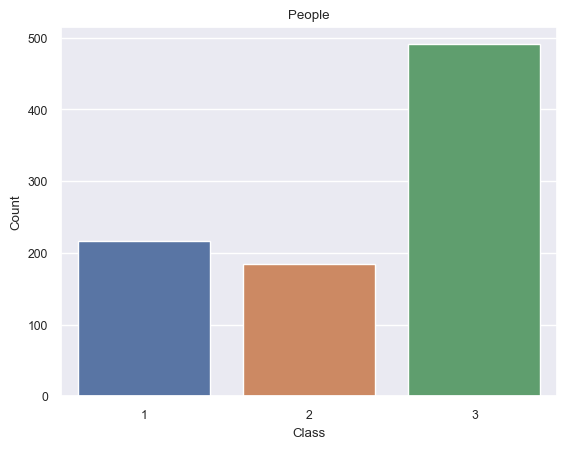

In [45]:
sns.countplot(data = data, x= "Pclass")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("People")

In [46]:

data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [47]:
data.drop(['Ticket', 'Fare', 'Cabin', 'Name'], axis=1, inplace=True)

In [48]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,S
888,1,1,female,19.0,0,0,S
889,0,3,female,NaN,1,2,S


In [49]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 'Sex'와 'Embarked' 열을 LabelEncoder로 변환
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2


In [50]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [51]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


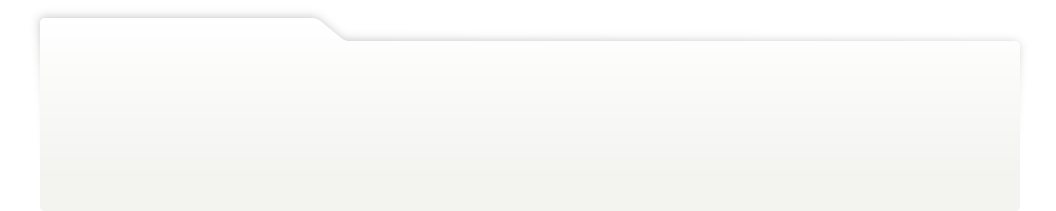
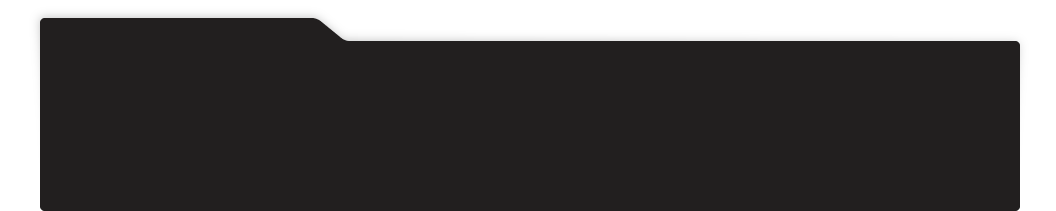
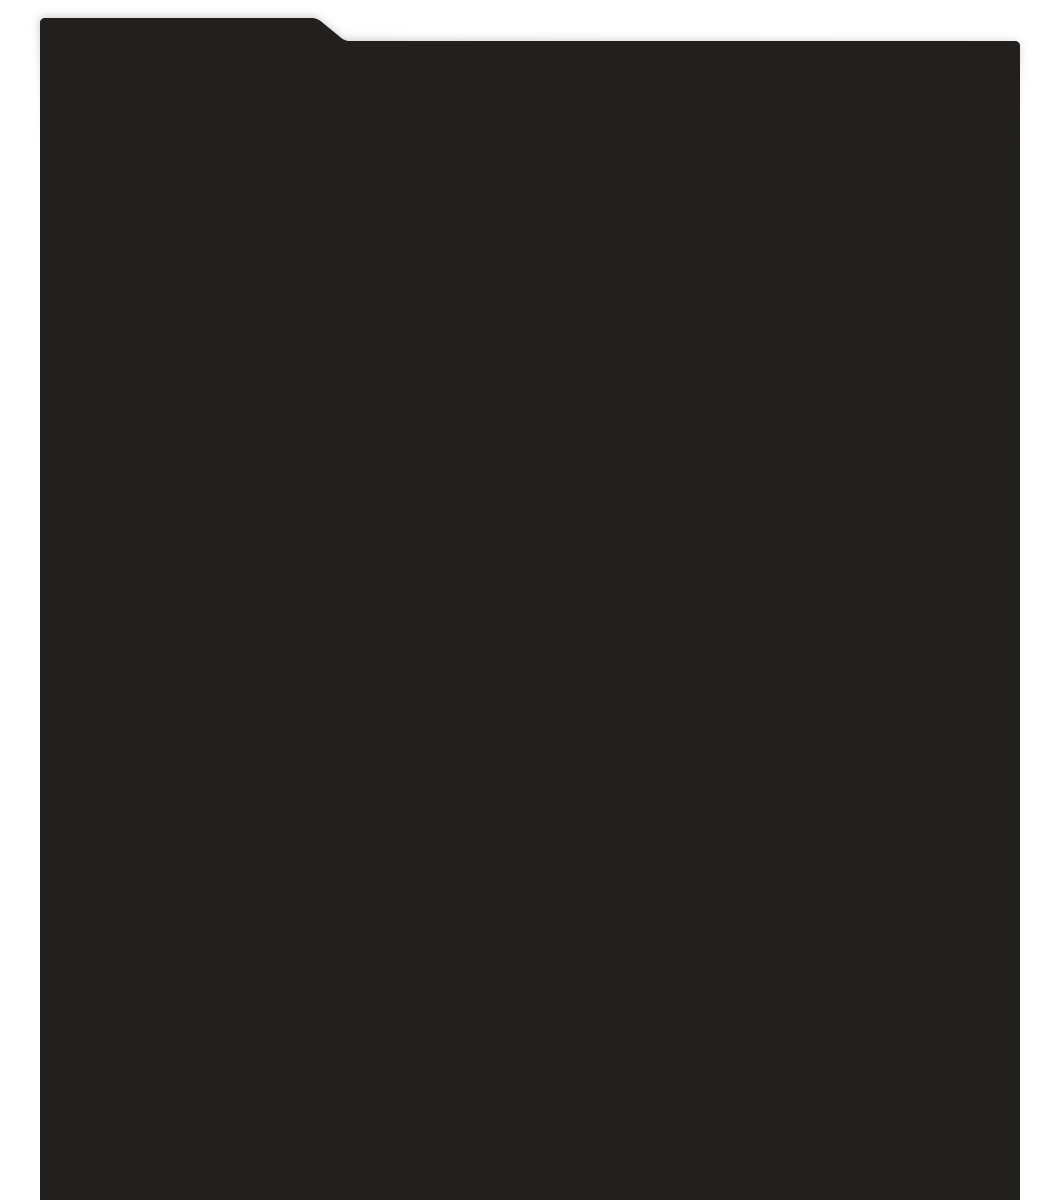
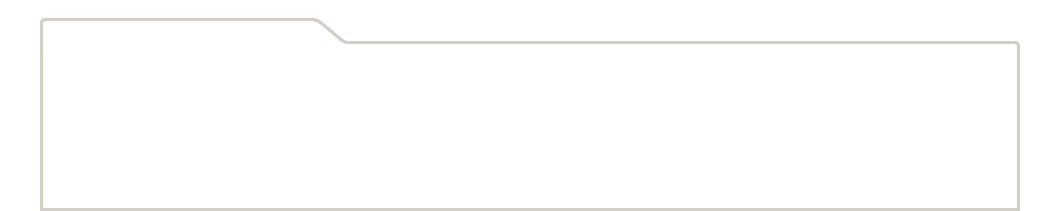
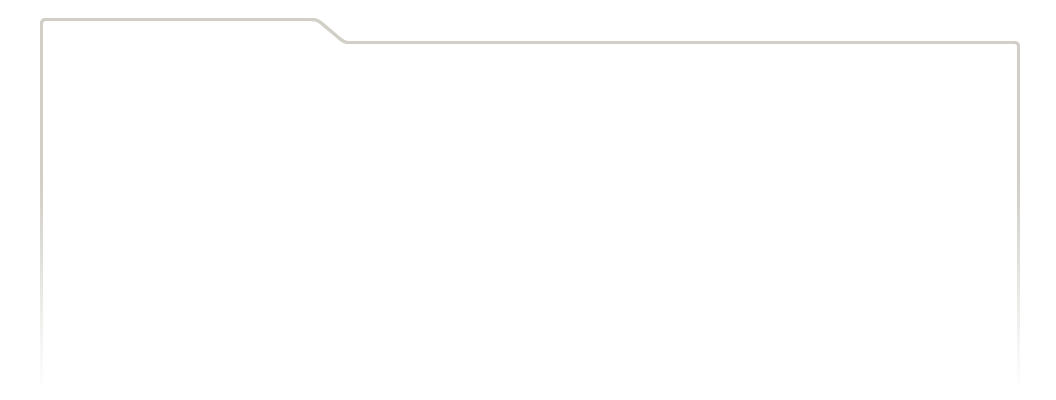
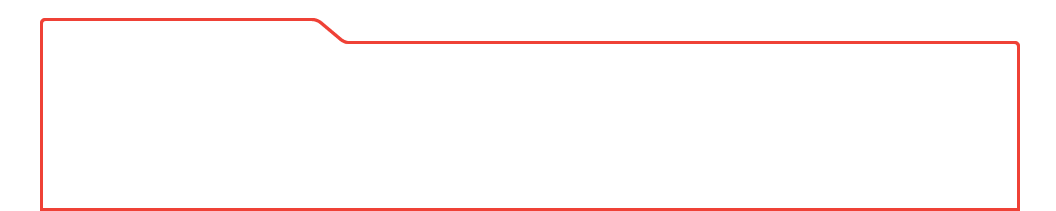
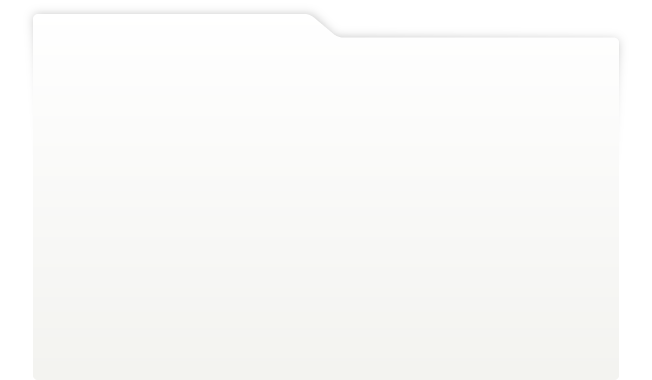
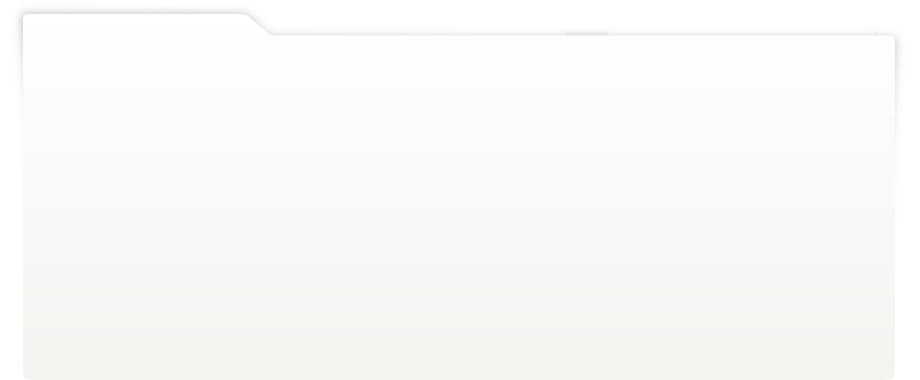
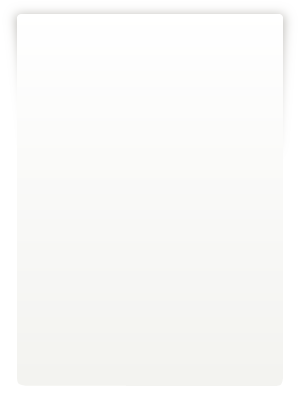
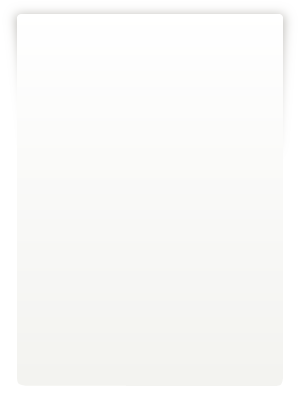
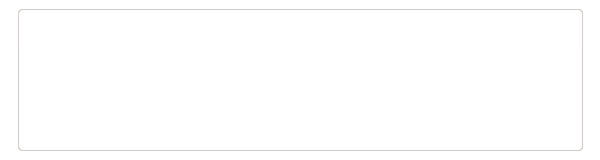
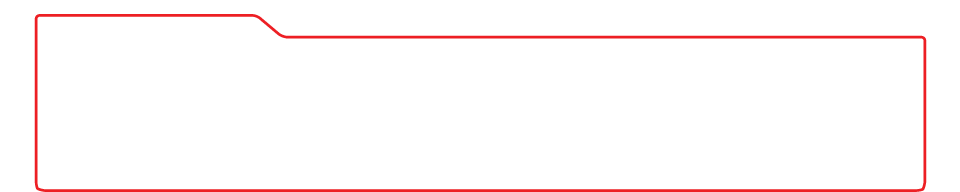
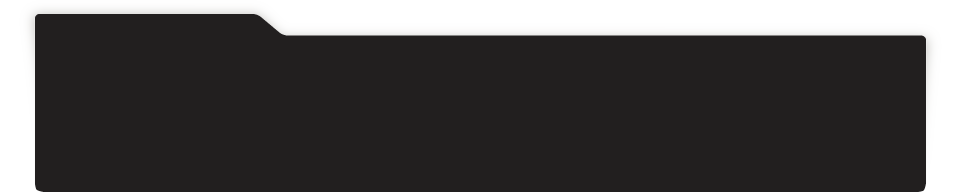
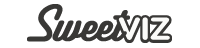
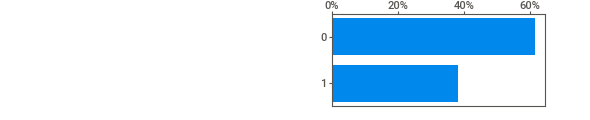
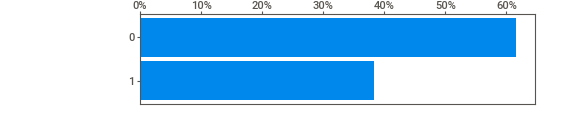
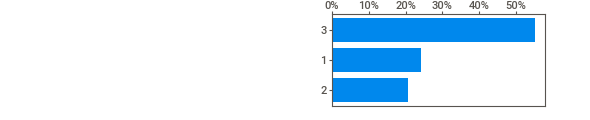
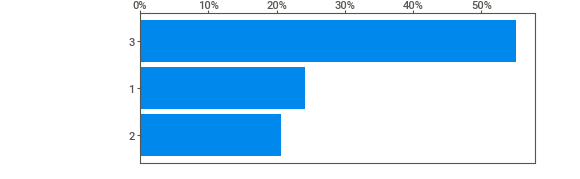
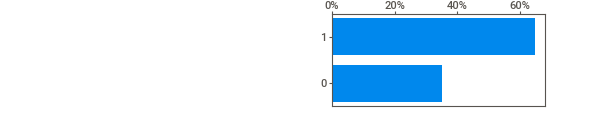
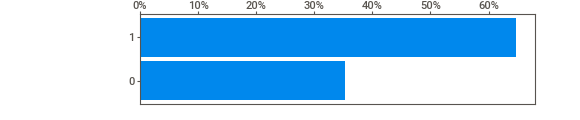
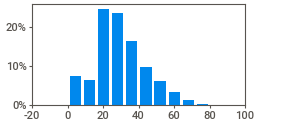
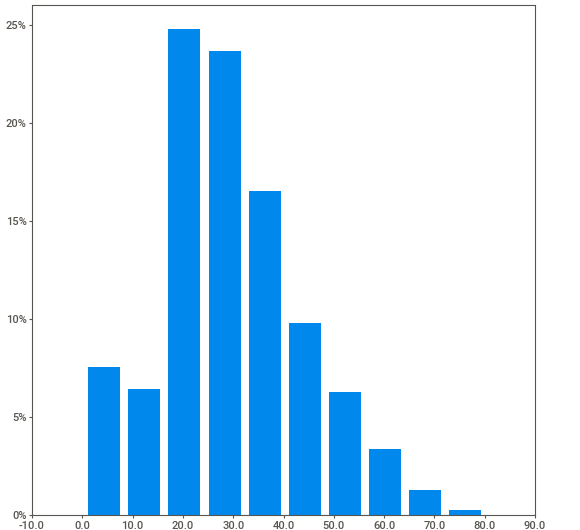
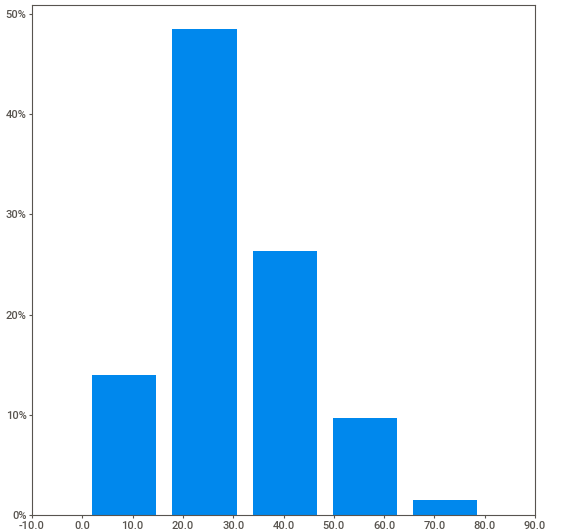
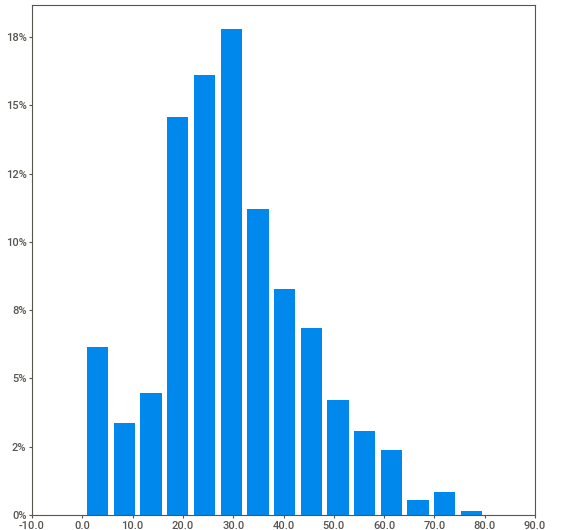
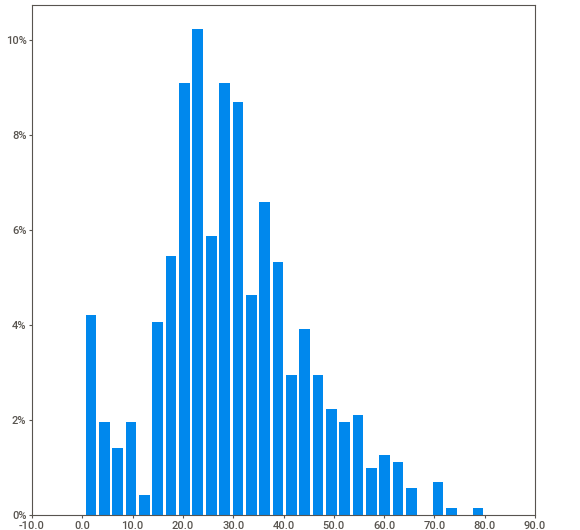
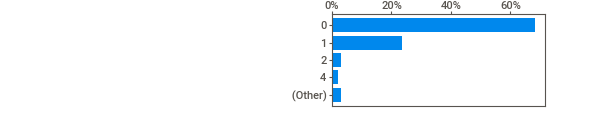
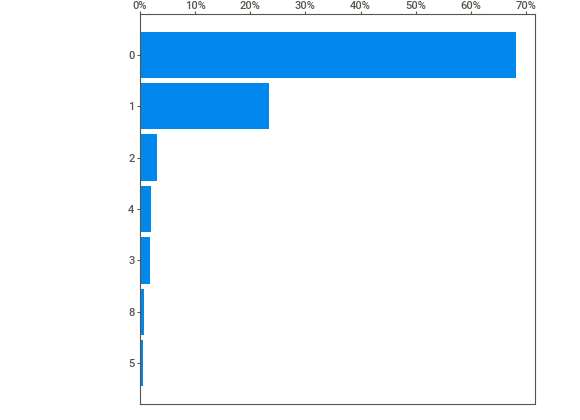
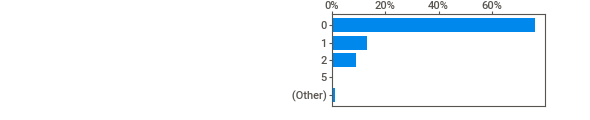
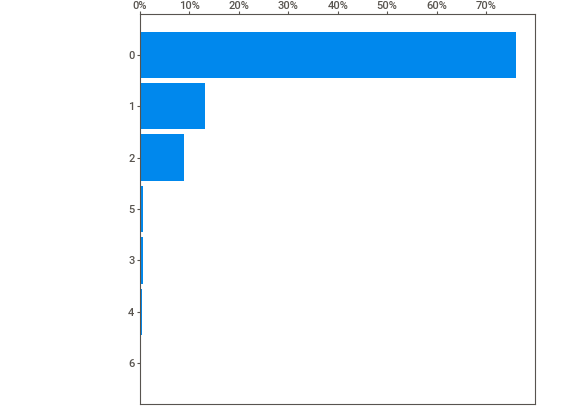
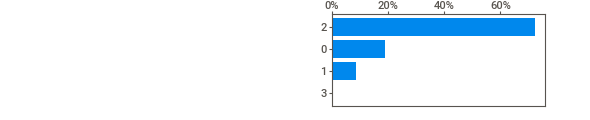
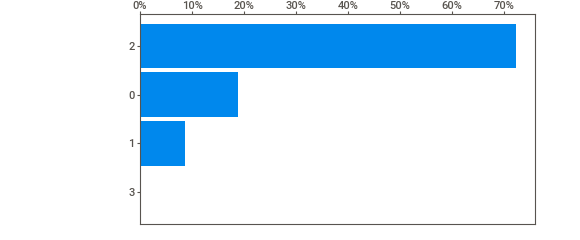
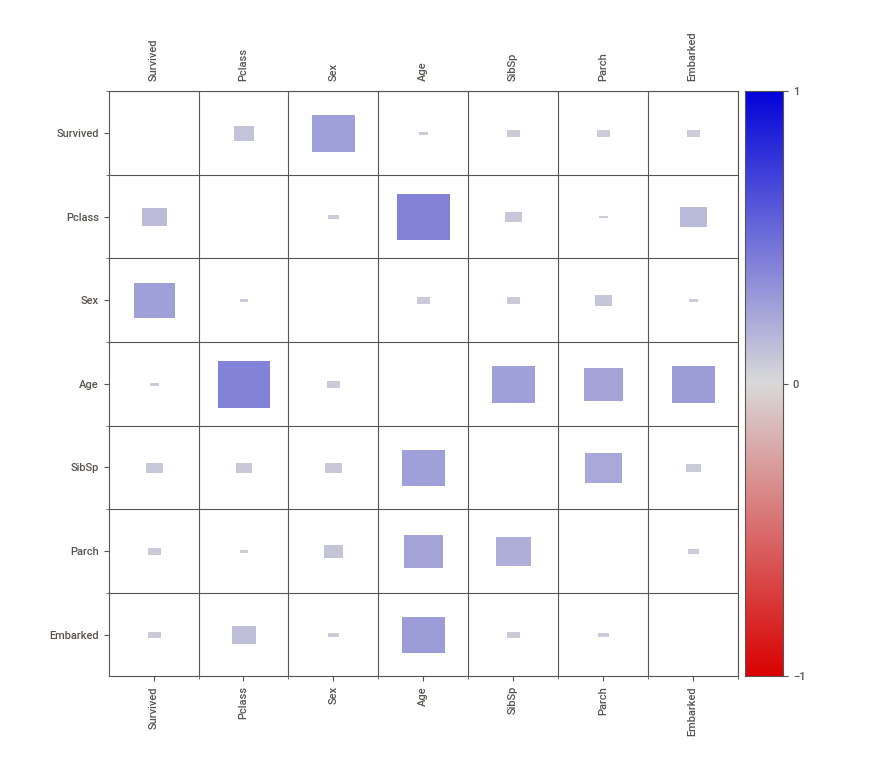
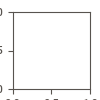

In [52]:
import sweetviz
sweetviz.analyze(data).show_notebook()

In [53]:
data.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
SibSp        7
Parch        7
Embarked     4
dtype: int64

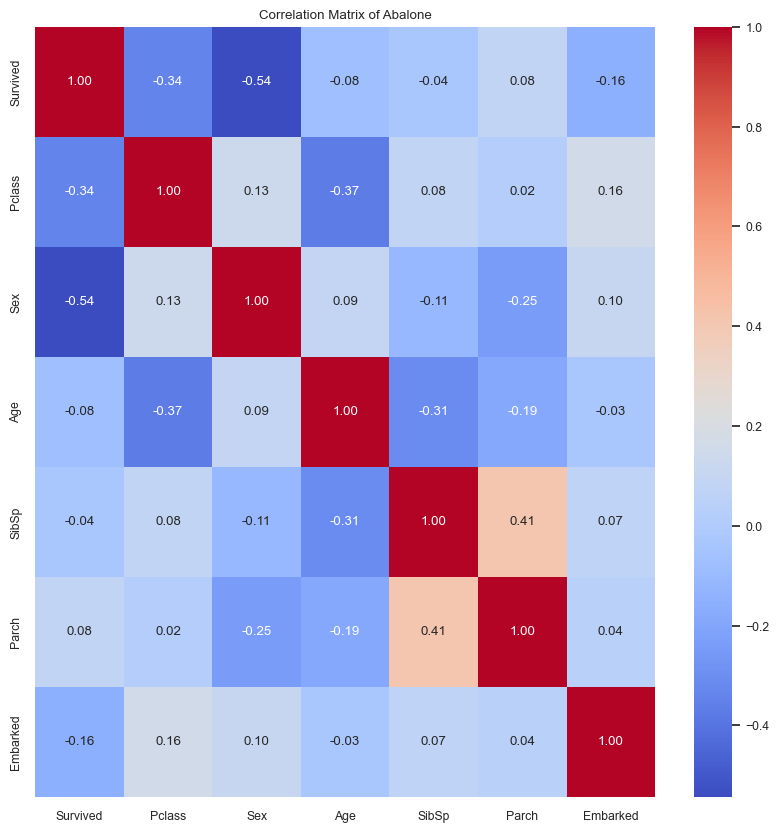

In [54]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

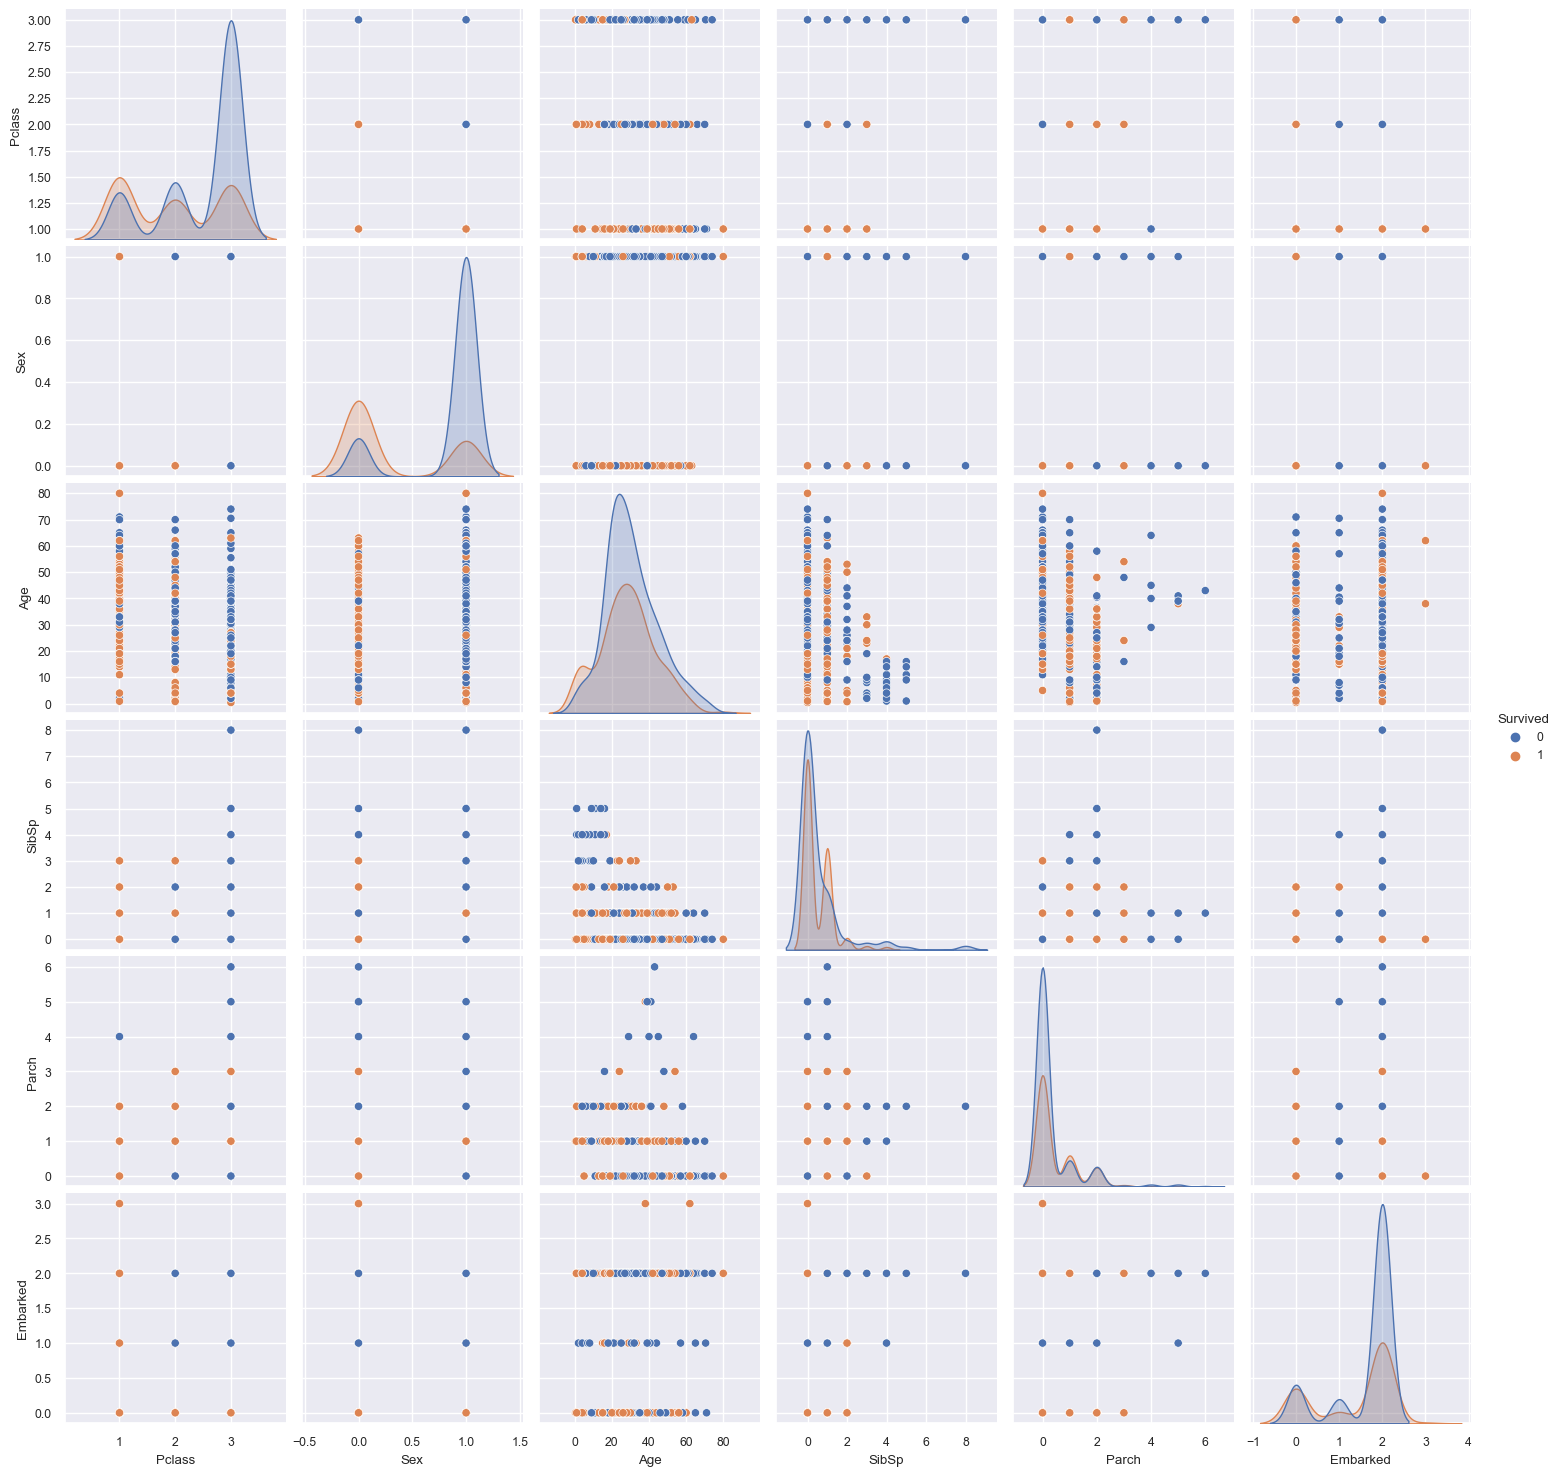

In [55]:
import seaborn as sns

sns.pairplot(data,
             vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
            hue = 'Survived')
plt.show()

In [56]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [57]:
data.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
SibSp        7
Parch        7
Embarked     4
dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

X = data.drop('Survived', axis=1)
y = data['Survived']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# StandardScaler 적용
scaler = StandardScaler()

'''
# MinMaxScaler 적용
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# RobustScaler 적용
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

'''


# NaN 값을 평균으로 채우기
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_standard_scaled = scaler.fit_transform(X_train_imputed)
X_test_standard_scaled = scaler.transform(X_test_imputed)


In [109]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2


In [110]:

# SVM 모델 훈련 및 예측
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_standard_scaled, y_train)
pred_svm = clf_svm.predict(X_test_standard_scaled)

# 결과 출력
print("\n--- SVM Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.8026905829596412
Confusion Matrix:
 [[121  18]
 [ 26  58]]


In [111]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_standard_scaled, y_train)

pred_lr = clf_lr.predict(X_test_standard_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7937219730941704
[[116  23]
 [ 23  61]]


In [112]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_standard_scaled, y_train)

pred_dt = clf_dt.predict(X_test_standard_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7713004484304933
[[117  22]
 [ 29  55]]


In [113]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_standard_scaled, y_train)
pred = rf_clf.predict(X_test_standard_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7757847533632287
[[114  25]
 [ 25  59]]


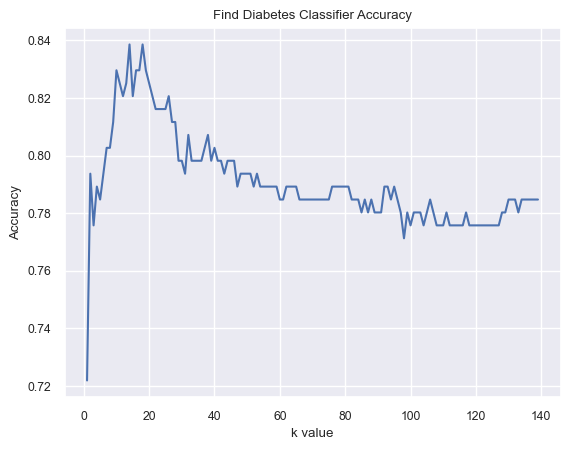

In [114]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 140)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_standard_scaled, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_standard_scaled, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

X = data.drop('Survived', axis=1)
y = data['Survived']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

'''
# StandardScaler 적용
scaler = StandardScaler()
'''
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

'''
# MinMaxScaler 적용
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# RobustScaler 적용
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

'''


# NaN 값을 평균으로 채우기
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_standard_scaled = scaler.fit_transform(X_train_imputed)
X_test_standard_scaled = scaler.transform(X_test_imputed)


In [116]:

# SVM 모델 훈련 및 예측
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_standard_scaled, y_train)
pred_svm = clf_svm.predict(X_test_standard_scaled)

# 결과 출력
print("\n--- SVM Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.8026905829596412
Confusion Matrix:
 [[121  18]
 [ 26  58]]


In [117]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_standard_scaled, y_train)

pred_lr = clf_lr.predict(X_test_standard_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7937219730941704
[[116  23]
 [ 23  61]]


In [118]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_standard_scaled, y_train)

pred_dt = clf_dt.predict(X_test_standard_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7713004484304933
[[117  22]
 [ 29  55]]


In [119]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_standard_scaled, y_train)
pred = rf_clf.predict(X_test_standard_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7757847533632287
[[114  25]
 [ 25  59]]


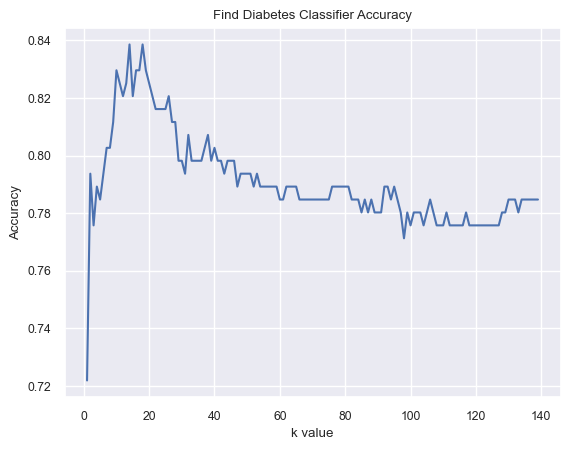

In [120]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 140)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_standard_scaled, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_standard_scaled, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

X = data.drop('Survived', axis=1)
y = data['Survived']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

'''
# StandardScaler 적용
scaler = StandardScaler()
'''
robust_scaler = RobustScaler()

'''
# MinMaxScaler 적용
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# RobustScaler 적용
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

'''


# NaN 값을 평균으로 채우기
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_standard_scaled = scaler.fit_transform(X_train_imputed)
X_test_standard_scaled = scaler.transform(X_test_imputed)


In [122]:

# SVM 모델 훈련 및 예측
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_standard_scaled, y_train)
pred_svm = clf_svm.predict(X_test_standard_scaled)

# 결과 출력
print("\n--- SVM Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.8026905829596412
Confusion Matrix:
 [[121  18]
 [ 26  58]]


In [123]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_standard_scaled, y_train)

pred_lr = clf_lr.predict(X_test_standard_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7937219730941704
[[116  23]
 [ 23  61]]


In [124]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_standard_scaled, y_train)

pred_dt = clf_dt.predict(X_test_standard_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7713004484304933
[[117  22]
 [ 29  55]]


In [125]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_standard_scaled, y_train)
pred = rf_clf.predict(X_test_standard_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7757847533632287
[[114  25]
 [ 25  59]]


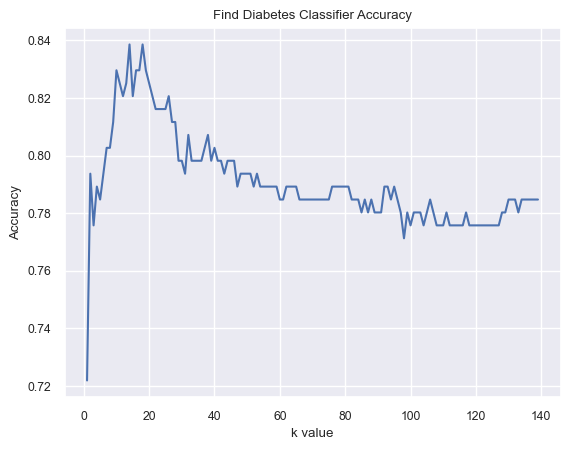

In [126]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 140)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_standard_scaled, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_standard_scaled, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()